# Organización de Datos - TP 1 - EVENTS

Alumnos:
- *Rodriguez, Agustín*
- *Scetta, María de los Ángeles*

In [1]:
#Carga de librerías a utilizar
import pandas as pd
import numpy as np
import missingno as msno
import calendar
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carga de datos recibidos
events=pd.read_csv('../data/raw/events.csv.gzip', compression='gzip', parse_dates=['date'])

C:\Users\27356214477\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Events**

In [6]:
#Cantidad de registros y variables
events.shape

(2494423, 22)

In [7]:
#Revisión de valores nulos
events.isna().sum()

date                        0
event_id                    0
ref_type                    0
ref_hash                    0
application_id              0
attributed                  0
device_countrycode          0
device_os_version     1472357
device_brand          1329460
device_model            87967
device_city           1879725
session_user_agent      11786
trans_id              2494341
user_agent            1102896
event_uuid               5099
carrier               1877989
kind                     5099
device_os             1836756
wifi                  1115551
connection_type       1881960
ip_address                  0
device_language         87819
dtype: int64

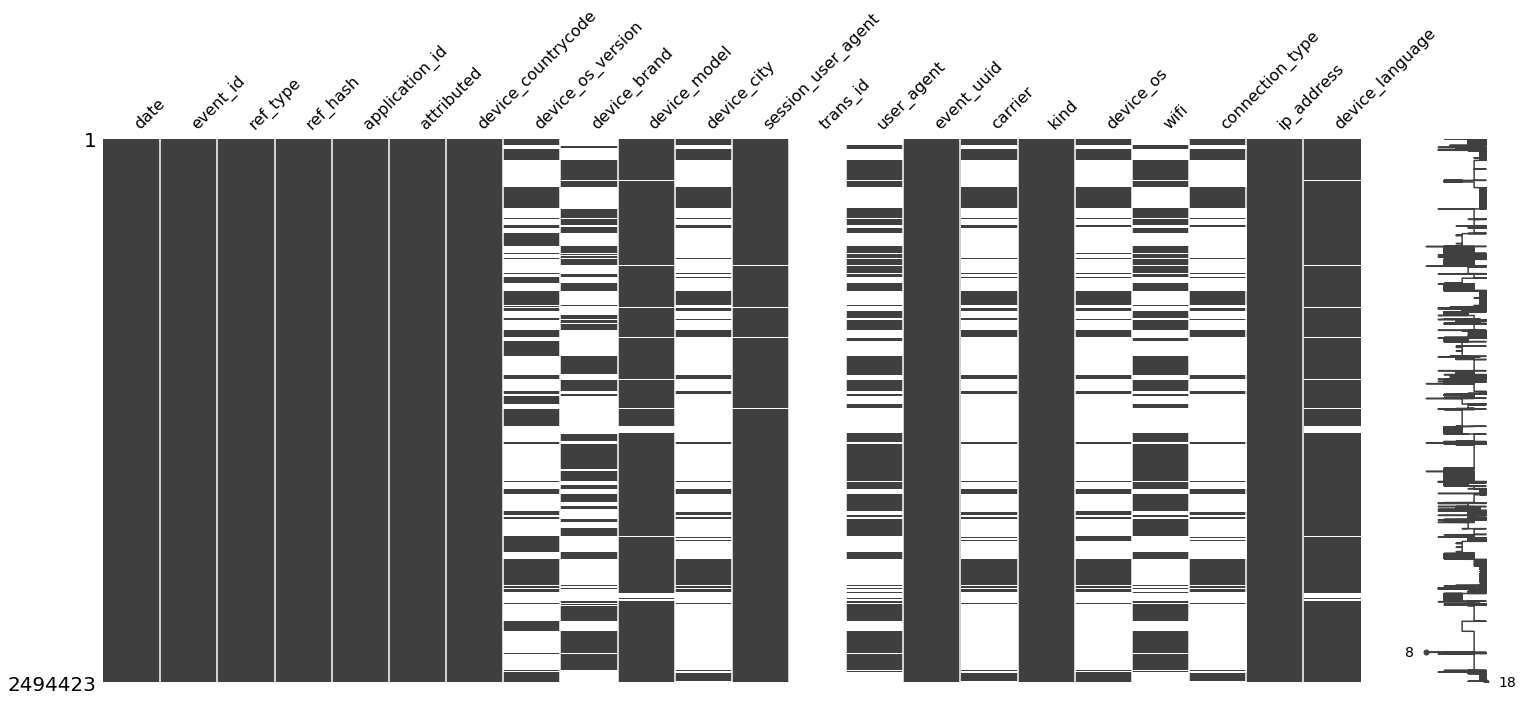

In [9]:
msno.matrix(events)

In [28]:
#Revisión de la estructura de datos
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,fecha,dia_semana
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019-03-05,Tuesday
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019-03-09,Saturday


###  **Análisis de las variables del dataset**

In [3]:
#Búsqueda de valores únicos
events.nunique()

date                  2488829
event_id                  568
ref_type                    2
ref_hash               196049
application_id            269
attributed                  2
device_countrycode          1
device_os_version          81
device_brand              250
device_model             2624
device_city               127
session_user_agent       1460
trans_id                   13
user_agent               5111
event_uuid            2489324
carrier                    84
kind                      583
device_os                   4
wifi                        2
connection_type             3
ip_address             285212
device_language           186
dtype: int64

#### date

In [3]:
#Revisión de la variable date
events['fecha'] = events['date'].dt.date
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,fecha
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019-03-05
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019-03-09


In [4]:
#Función para nombrar días de la semana
def dia_semana(fecha):
    return calendar.day_name[fecha.weekday()]

In [5]:
events['dia_semana'] = events['fecha'].map(dia_semana)
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,fecha,dia_semana
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019-03-05,Tuesday
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019-03-09,Saturday


In [7]:
#Cantidad de eventos por día de la semana
events.groupby(["fecha", "dia_semana"]).size().to_frame('cant_events').reset_index()

,fecha,dia_semana,cant_events
0,2019-03-05,Tuesday,240549
1,2019-03-06,Wednesday,253505
2,2019-03-07,Thursday,253706
3,2019-03-08,Friday,285535
4,2019-03-09,Saturday,286221
5,2019-03-10,Sunday,293091
6,2019-03-11,Monday,268884
7,2019-03-12,Tuesday,296665
8,2019-03-13,Wednesday,316267


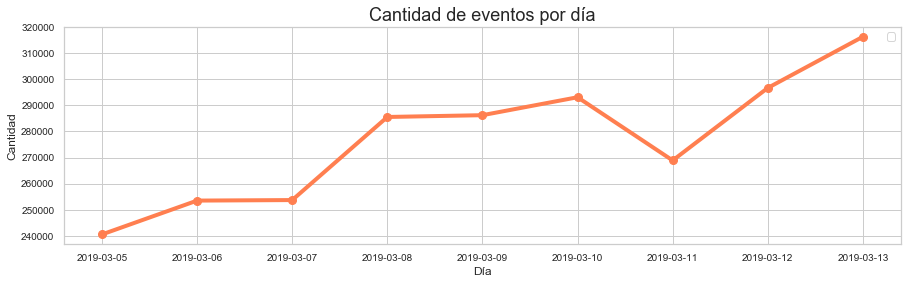

In [8]:
#Visualizar los eventos por día
sns.set(style="whitegrid")
events.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='coral', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de eventos por día', fontsize=18)
plt.legend('')
plt.savefig("events_dia.png")
plt.show()

In [19]:
events.groupby("fecha").size().mean()

277158.1111111111

In [9]:
#Revisión de los eventos por hora
events['hora'] = events['date'].dt.hour
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,fecha,dia_semana,hora
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday,0
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday,0
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,Tuesday,0
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019-03-05,Tuesday,0
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019-03-09,Saturday,21


In [10]:
hora_group=events.groupby(["fecha","dia_semana", "hora"]).size().to_frame('cant_events').reset_index()
hora_group.head()

,fecha,dia_semana,hora,cant_events
0,2019-03-05,Tuesday,0,17154
1,2019-03-05,Tuesday,1,15926
2,2019-03-05,Tuesday,2,13818
3,2019-03-05,Tuesday,3,12110
4,2019-03-05,Tuesday,4,8225


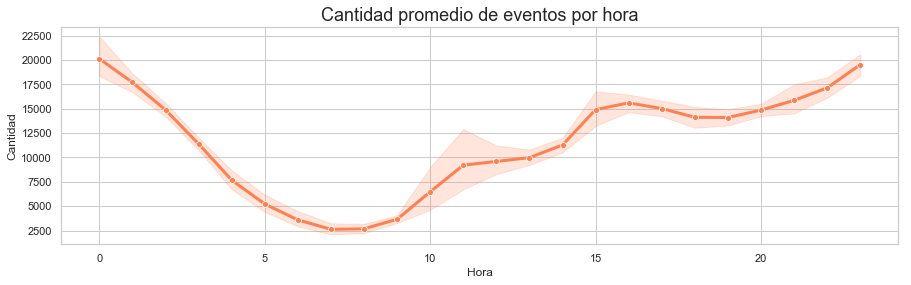

In [12]:
#Análisis de cantidad promedio de eventos por hora
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_events', color='coral', linewidth=3, marker='o', markersize=6, data=hora_group, ax=ax)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de eventos por hora', fontsize=18)
plt.savefig("events_hora.png")
plt.show()

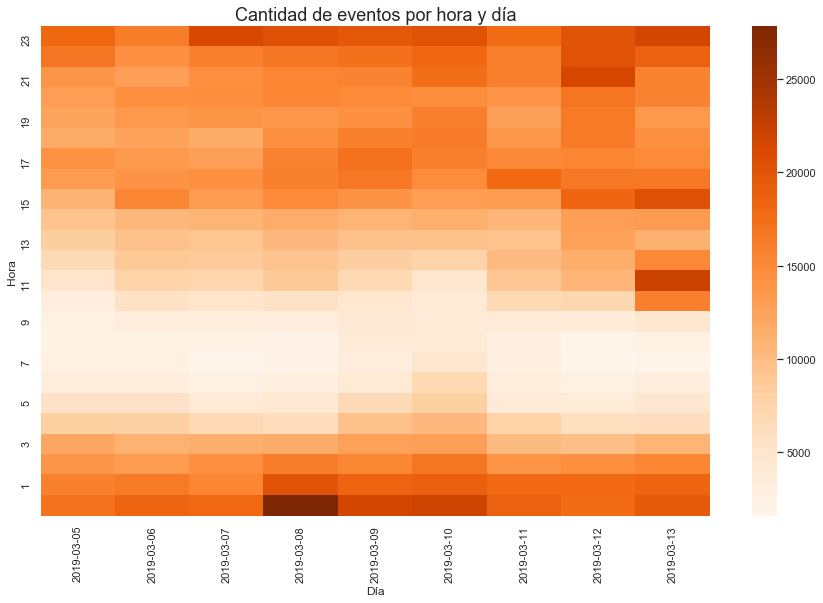

In [13]:
#Análisis de cantidad de eventos por hora y día
events_heatmap = hora_group.pivot_table(index='hora', columns='fecha', values='cant_events', aggfunc='sum')
events_heatmap = events_heatmap.sort_index(ascending=False)
g = sns.heatmap(events_heatmap, cmap="Oranges")
g.set_title("Cantidad de eventos por hora y día", fontsize=18)
g.set_xlabel("Día",fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(15)
fig.set_figheight(9)

plt.savefig("events_dia_hora.png")

In [14]:
hora_group.loc[(hora_group.dia_semana == 'Saturday') | (hora_group.dia_semana == 'Sunday'), 'Categoria'] = 'Día Finde' 
hora_group.loc[(hora_group.dia_semana != 'Saturday') & (hora_group.dia_semana != 'Sunday'), 'Categoria'] = 'Día Hábil'
hora_group.head()

,fecha,dia_semana,hora,cant_events,Categoria
0,2019-03-05,Tuesday,0,17154,Día Hábil
1,2019-03-05,Tuesday,1,15926,Día Hábil
2,2019-03-05,Tuesday,2,13818,Día Hábil
3,2019-03-05,Tuesday,3,12110,Día Hábil
4,2019-03-05,Tuesday,4,8225,Día Hábil


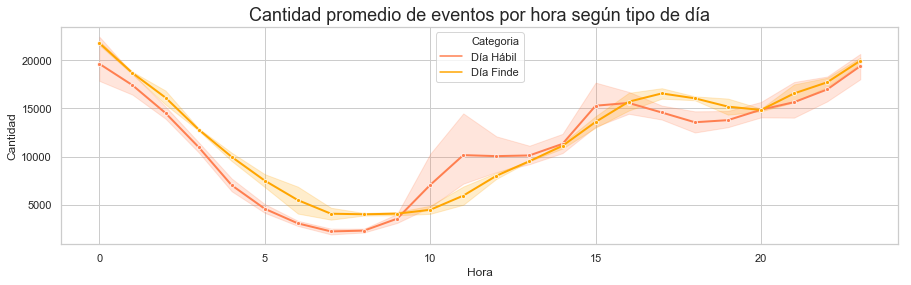

In [16]:
#Análisis de cantidad promedio eventos por hora según tipo de día
paleta=['coral', 'orange']
sns.set(style="whitegrid")
fig, ax=plt.subplots(1,1, figsize=(15,4))
sns.lineplot('hora', 'cant_events', hue= "Categoria", palette=paleta, linewidth=2, marker='o', markersize=4, data=hora_group, ax=ax)
plt.legend(ncol=1, loc='upper center');
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.title('Cantidad promedio de eventos por hora según tipo de día', fontsize=18)
plt.savefig("events_tipo_dia_hora.png")
plt.show()

#### event_id

In [18]:
#Cantidad de veces que ocurrió cada tipo de evento
events_app=events.groupby("event_id").size().to_frame('cantidad')
events_app['cantidad'].sort_values(ascending=False).head()

event_id
22     618228
31     417070
161    217846
1      157812
138    100039
Name: cantidad, dtype: int64

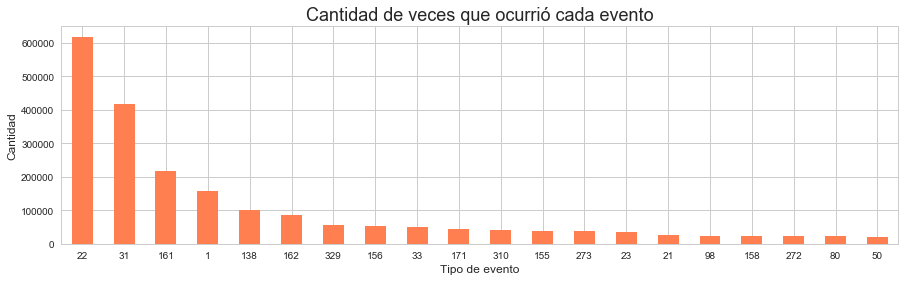

In [32]:
#Visualizar los 20 tipos de eventos que más ocurrieron
sns.set(style="whitegrid")
events_app['cantidad'].sort_values(ascending=False).head(20).plot.bar(rot=0, figsize=(15,4), color='coral', fontsize=10);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Tipo de evento', fontsize=12)
plt.title('Cantidad de veces que ocurrió cada evento', fontsize=18)
plt.legend('')
plt.savefig("events_cant_veces.png")
plt.show()

In [30]:
#Cantidad de veces que ocurrió cada tipo de evento por día
events_app_dia=events.groupby(["event_id", "fecha"]).size().to_frame('cantidad').reset_index()
events_app_dia.head()

,event_id,fecha,cantidad
0,0,2019-03-05,2
1,0,2019-03-06,11
2,0,2019-03-07,9
3,0,2019-03-08,7
4,0,2019-03-09,4


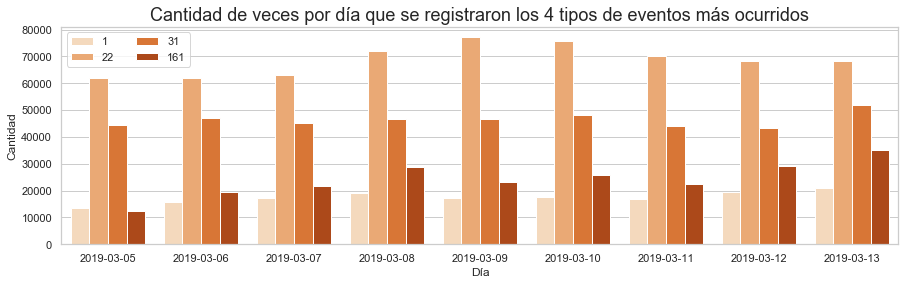

In [36]:
#Visualización los 4 tipos de eventos que ocurrieron más de 100.000 veces
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cantidad", palette="Oranges", hue="event_id",
            data=events_app_dia[(events_app_dia.event_id==22) | (events_app_dia.event_id==31) | 
                                   (events_app_dia.event_id==161) | (events_app_dia.event_id==1)]);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de veces por día que se registraron los 4 tipos de eventos más ocurridos', fontsize=18)
plt.legend(ncol=2, loc='upper left'),
plt.savefig("events_20_por_dia.png")
plt.show()

#### ref_type

In [83]:
events.ref_type.value_counts()

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

In [37]:
ref_type = events[['ref_type']]
type_1 = events[(events['ref_type'] == 1891515180541284343)]
type_2 = events[(events['ref_type'] == 1494519392962156891)]

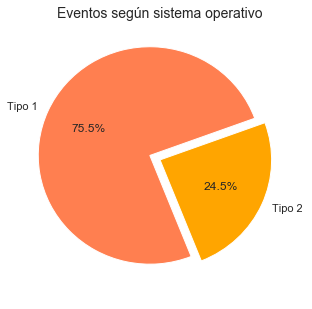

In [44]:
sizes = [type_1.ref_type.count(), type_2.ref_type.count()]
nombres = ['Tipo 1', 'Tipo 2']

plt.figure(figsize=(5, 5))
plt.title('Eventos según sistema operativo', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['coral', 'orange'], explode=(0.1, 0))
plt.savefig("events_reftype_pct.png")
plt.show()

#### ref_hash

In [50]:
#Cantidad de IDs de dispositivos por día
events_usuarios=events.groupby("ref_hash").size().to_frame('cantidad')
events_usuarios['cantidad'].sort_values(ascending=False).head(10)

ref_hash
7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
Name: cantidad, dtype: int64

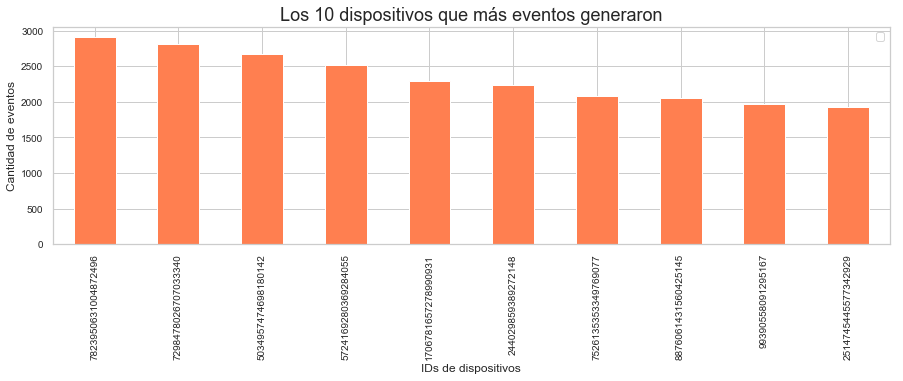

In [47]:
#Visualizar los 10 dispositivos que más eventos generaron
sns.set(style="whitegrid")
events_usuarios['cantidad'].sort_values(ascending=False).head(10).plot.bar(rot=90, figsize=(15,4), color='coral', fontsize=10);
plt.ylabel('Cantidad de eventos', fontsize=12)
plt.xlabel('IDs de dispositivos', fontsize=12)
plt.title('Los 10 dispositivos que más eventos generaron', fontsize=18)
plt.legend('')
plt.savefig("events_10_dispositvos.png")
plt.show()

In [52]:
#Cantidad de veces que cada usuario generó un evento por día
cant_usuarios_dia=events.groupby(["ref_hash", "fecha"]).size().to_frame('cantidad')
cant_usuarios_dia['cantidad'].sort_values(ascending=False).head()

ref_hash             fecha     
1392381574052047210  2019-03-06    1153
2906858093759963779  2019-03-13    1151
1908018224620571407  2019-03-12    1123
1706781657278990931  2019-03-09     994
6431911391083614553  2019-03-08     992
Name: cantidad, dtype: int64

In [53]:
#Cantidad de usuarios que generaron eventos por día
cant_usuarios=cant_usuarios_dia.groupby(["fecha"]).size().to_frame('cant_usuarios')
cant_usuarios

,cant_usuarios
fecha,
2019-03-05,42750
2019-03-06,44157
2019-03-07,45084
2019-03-08,49264
2019-03-09,48003
2019-03-10,47231
2019-03-11,45091
2019-03-12,46995
2019-03-13,50145


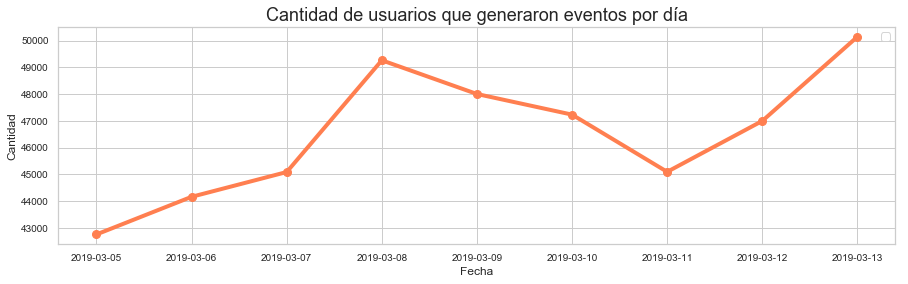

In [54]:
#Visualizar la cantidad de usuarios que generaron eventos por día
sns.set(style="whitegrid")
cant_usuarios_dia.groupby("fecha").size().plot.line(rot=0, figsize=(15,4), color='coral', linewidth=4, fontsize=10, marker='o', markersize=8);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.title('Cantidad de usuarios que generaron eventos por día', fontsize=18)
plt.legend('')
plt.savefig("events_usuarios_x_dia.png")
plt.show()

#### application_id

In [72]:
events.application_id.value_counts().head(10)

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
Name: application_id, dtype: int64

#### attributed

In [55]:
events.attributed.value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

#### wifi

In [58]:
events.wifi.value_counts()

True     930902
False    447970
Name: wifi, dtype: int64

In [59]:
wifi = events[['wifi']]
Wifi = events[(events['wifi'] == True)]
Datos = events[(events['wifi'] == False)]

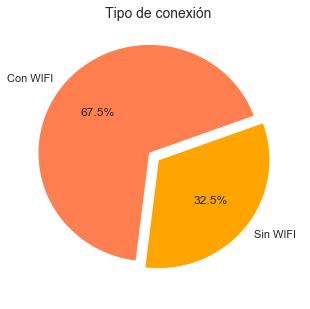

In [67]:
sizes = [Wifi.wifi.count(), Datos.wifi.count()]
nombres = ['Con WIFI', 'Sin WIFI']

plt.figure(figsize=(5, 5))
plt.title('Tipo de conexión', fontsize=14)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['coral', 'orange'], explode=(0.1, 0))
plt.savefig("events_wifi_pct.png")
plt.show()

In [68]:
#Cantidad de eventos por día según tipo de conexión
events_wifi=events.groupby(["wifi", "fecha"]).size().to_frame('cant_wifi').reset_index()
events_wifi.head()

,wifi,fecha,cant_wifi
0,False,2019-03-05,49543
1,False,2019-03-06,49202
2,False,2019-03-07,47408
3,False,2019-03-08,51519
4,False,2019-03-09,54827


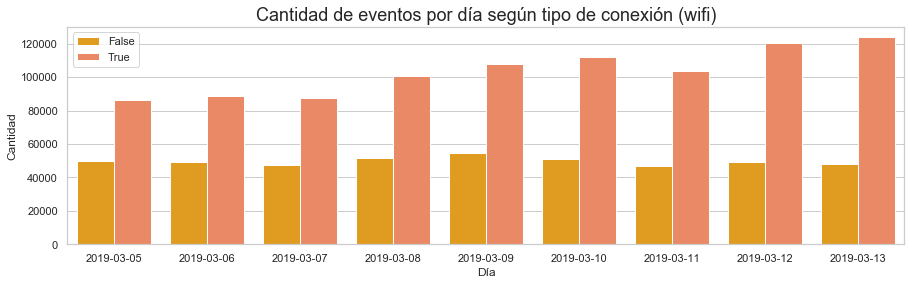

In [70]:
#Análisis de la cantidad de instalación por día según tipo de conexión
paleta=['orange', 'coral']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))
sns.barplot(x="fecha", y="cant_wifi", palette=paleta, hue="wifi",
            data=events_wifi);
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Día', fontsize=12)
plt.title('Cantidad de eventos por día según tipo de conexión (wifi)', fontsize=18)
plt.legend(ncol=1, loc='upper left'),
plt.savefig("events_wifi_dia.png")
plt.show()